<a href="https://colab.research.google.com/github/CKBhalaji/Artificial-Intelligence-and-Machine-Learning/blob/main/AIML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex-1-Tic-tac-toe Game

In [ ]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
            return True
    return any(all(board[i][j] == player for j in range(3)) for i in range(3)) or \
           any(all(board[i][i] == player for i in range(3)) for i in range(3)) or \
           any(all(board[i][2 - i] == player for i in range(3)) for i in range(3))

def is_full(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

def minimax(board, depth, maximizing_player):
    if check_winner(board, 'O'): return -1
    if check_winner(board, 'X'): return 1

    if is_full(board): return 0
    if depth >= 3:
        return 0

    scores = [minimax(board, depth + 1, not maximizing_player) for i, j in get_empty_cells(board)]
    return max(scores) if maximizing_player else min(scores)

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

def get_best_move(board):
    return max(get_empty_cells(board), key=lambda move: minimax(board, 0, False))

def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]

    while True:
        print_board(board)

        player_row, player_col = map(int, input("Enter row and column (separated by space): ").split())
        if board[player_row][player_col] == ' ':
            board[player_row][player_col] = 'O'
        else:
            print("Cell already occupied. Try again.")
            continue

        if check_winner(board, 'O'):
            print_board(board)
            print("You win!")
            break

        if is_full(board):
            print_board(board)
            print("It's a tie!")
            break

        print("Computer's turn:")
        computer_row, computer_col = get_best_move(board)
        board[computer_row][computer_col] = 'X'

        if check_winner(board, 'X'):
            print_board(board)
            print("Computer wins!")
            break

        if is_full(board):
            print_board(board)
            print("It's a tie!")
            break

if __name__ == "__main__":
    play_game()


  |   |  
---------
  |   |  
---------
  |   |  
---------
Enter row and column (separated by space): 1 2
Computer's turn:
X |   |  
---------
  |   | O
---------
  |   |  
---------
Enter row and column (separated by space): 1 1
Computer's turn:
X | X |  
---------
  | O | O
---------
  |   |  
---------
Enter row and column (separated by space): 1 0
X | X |  
---------
O | O | O
---------
  |   |  
---------
You win!


Ex-2-Tower Of Hanoi

In [ ]:
def solve_tower_of_hanoi_bfs(n):
    queue = [(n, "A", "C", "B")]
    while queue:
        disks, source, destination, auxiliary = queue.pop(0)
        if disks == 1:
            print("Move disk 1 from", source, "to", destination)
        else:
            queue.append((disks - 1, source, auxiliary, destination))
            queue.append((disks - 1, auxiliary, source, destination))
            print("Move disk", disks, "from", source, "to", destination)

n = int(input("Enter the number of disks: "))
solve_tower_of_hanoi_bfs(n)


Enter the number of disks: 3
Move disk 3 from A to C
Move disk 2 from A to B
Move disk 2 from B to A
Move disk 1 from A to C
Move disk 1 from C to A
Move disk 1 from B to C
Move disk 1 from C to B


Ex-3-Greedy Best-First Search

In [ ]:
import heapq

def best_first_search(graph, start, goal):
    visited = set()
    queue = [(0, start)]  # Queue with (priority, node) tuples
    while queue:
        priority, node = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)
        print(f"Visiting node: {node}")
        if node == goal:
            return True  # Goal reached
        for neighbor, _ in graph[node]:
            if neighbor not in visited:
                heapq.heappush(queue, (heuristic[neighbor], neighbor))
    return False  # Goal not reachable

def a_star_search(graph, start, goal):
    visited = set()
    queue = [(0, start)]  # Queue with (f = g + h, node) tuples
    g_scores = {node: float('inf') for node in graph}
    g_scores[start] = 0
    while queue:
        _, node = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)
        print(f"Visiting node: {node}")
        if node == goal:
            return True  # Goal reached
        for neighbor, edge_cost in graph[node]:
            tentative_g = g_scores[node] + edge_cost
            if tentative_g < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g
                heapq.heappush(queue, (tentative_g + heuristic[neighbor], neighbor))
    return False  # Goal not reachable

# ... (rest of the code remains the same)

graph = {
    'A': [('B', 2), ('C', 5)],
    'B': [('D', 3)],
    'C': [('E', 4)],
    'D': [('F', 1)],
    'E': [('F', 3)],
    'F': []
}

# Example heuristic function
heuristic = {
    'A': 8,
    'B': 6,
    'C': 4,
    'D': 4,
    'E': 2,
    'F': 0
}

start_node = 'A'
goal_node = 'F'

# Using the Best First Search algorithm
print("Best First Search:")
print("Goal reached:", best_first_search(graph, start_node, goal_node))

# Using the A* algorithm
print("A* Search:")
print("Goal reached:", a_star_search(graph, start_node, goal_node))


Best First Search:
Visiting node: A
Visiting node: C
Visiting node: E
Visiting node: F
Goal reached: True
A* Search:
Visiting node: A
Visiting node: B
Visiting node: C
Visiting node: D
Visiting node: F
Goal reached: True


Ex-4-Bayesian Network

In [ ]:
class Node:
    def __init__(self, name):
        self.name = name
        self.probabilities = {}
        self.parent_probabilities = {}

    def add_probability(self, state, probability):
        self.probabilities[state] = probability

    def add_parent(self, parent, conditional_probability):
        self.parent_probabilities[parent] = conditional_probability

    def get_probability(self, state, evidence):
        probability = self.probabilities[state]
        for parent, conditional_prob in self.parent_probabilities.items():
            parent_state = evidence[parent]
            probability *= conditional_prob
        return probability

def main():
    # Define the nodes: Rain (A) and Wet Grass (B)
    A = Node("A")  # Rain node
    A.add_probability("0", 0.7)  # P(A=0) - No rain
    A.add_probability("1", 0.3)  # P(A=1) - Rain
    B = Node("B")  # Wet Grass node
    B.add_probability("0", 0.8)  # P(B=0) - Grass not wet
    B.add_probability("1", 0.2)  # P(B=1) - Grass wet
    B.add_parent(A, 0.6)  # P(B=1|A=0) - Grass wet given no rain
    B.add_parent(A, 0.4)  # P(B=1|A=1) - Grass wet given rain

    # Calculate P(B=1|A=0)
    evidence_no_rain = {A: "0"}  # No rain (A=0)
    p_B1_given_A0 = B.get_probability("0", evidence_no_rain)

    # Calculate P(B=1|A=1)
    evidence_rain = {A: "1"}  # Rain (A=1)
    p_B1_given_A1 = B.get_probability("1", evidence_rain)

    # Print probabilities in tabular format
    print("Probability of wet grass (B=1) given:")
    print("No rain (A=0): P(B=1|A=0) =", p_B1_given_A0)
    print("Rain (A=1): P(B=1|A=1) =", p_B1_given_A1)

if __name__ == "__main__":
    main()


Probability of wet grass (B=1) given:
No rain (A=0): P(B=1|A=0) = 0.32000000000000006
Rain (A=1): P(B=1|A=1) = 0.08000000000000002


Ex-5-Naive Bayesian Classification Using CSV File

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic data with a clear correlation
np.random.seed(42)
num_samples = 1000
temperature = np.random.randint(10, 30, size=num_samples)
humidity = np.random.randint(30, 80, size=num_samples)
# Introduce a clear correlation: if temperature is high or humidity is low, it's more likely to rain
raining = ((temperature > 25) | (humidity < 50)).astype(int)

df = pd.DataFrame({'temperature': temperature, 'humidity': humidity, 'raining': raining})

# Split the data into training and testing sets
X = df[['temperature', 'humidity']]
y = df['raining']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Make a prediction for a new data point
new_data_point = [[30, 20]]
prediction = classifier.predict(new_data_point)
if prediction[0] == 1:
    print("It's predicted to be raining.")
else:
    print("It's predicted to not be raining.")


Accuracy: 0.89
It's predicted to be raining.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Using CSV File In the Mail

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['nrain.csv']))

X = df[['temperature', 'humidity']]
y = df['raining']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

new_data_point = [[21, 68]]
prediction = classifier.predict(new_data_point)

if prediction[0] == 1:
    print("It's predicted to be raining.")
else:
    print("It's predicted to not be raining.")

Ex-6-KNN Algorithm to to clasify the iris dataset

In [ ]:
# K - N N ALGORITHM
# Install scikit-learn
!pip install scikit-learn

# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target (class labels)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with a specified number of neighbors (e.g., 3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# You can also test with new data samples by providing them to the KNN model
new_samples = np.array([[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.2, 2.0]])
new_predictions = knn.predict(new_samples)
print(f"Predictions for new samples: {new_predictions}")


Accuracy: 100.00%
Predictions for new samples: [0 2]


Ex-7-K-Means Algorithm for Color Compression

Saving wallpaperflare.com_wallpaper.jpg to wallpaperflare.com_wallpaper.jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


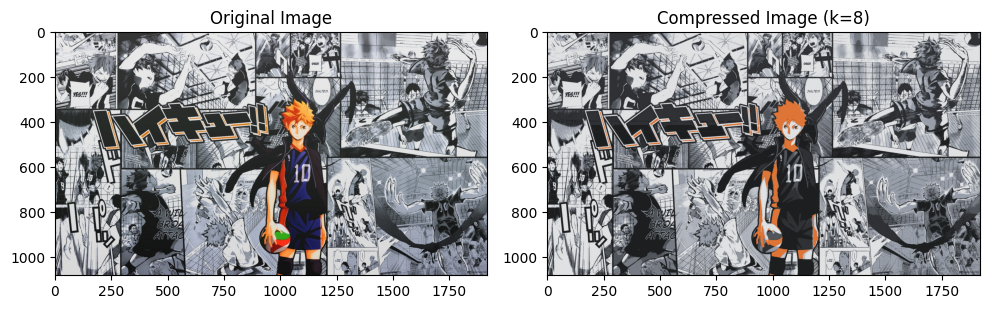

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
from google.colab import files

# Step 1: Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    image = io.imread(filename)

# Step 2: Reshape the image
# Convert the image to a 2D array of RGB values
image_reshaped = image.reshape(-1, 3)

# Step 3: Choose the number of colors (k) for compression
k = 8  # You can adjust this value based on your preference

# Step 4: Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(image_reshaped)

# Step 5: Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 6: Replace pixel values with cluster centers
compressed_image = cluster_centers[labels].reshape(image.shape)

# Step 7: Display the original and compressed images
plt.figure(figsize=(10, 5))

# Subplot 1: Original Image with Axes
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('on')  # Show axes for the original image

# Subplot 2: Compressed Image without Axes
plt.subplot(1, 2, 2)
plt.title(f"Compressed Image (k={k})")
plt.imshow(compressed_image.astype(np.uint8))
plt.axis('on')  # Hide axes for the compressed image

plt.tight_layout()
plt.show()


Ex-8-Lenior Regression Model

Intercept (theta_0): [4.55808002]
Coefficient (theta_1): [[2.96827553]]


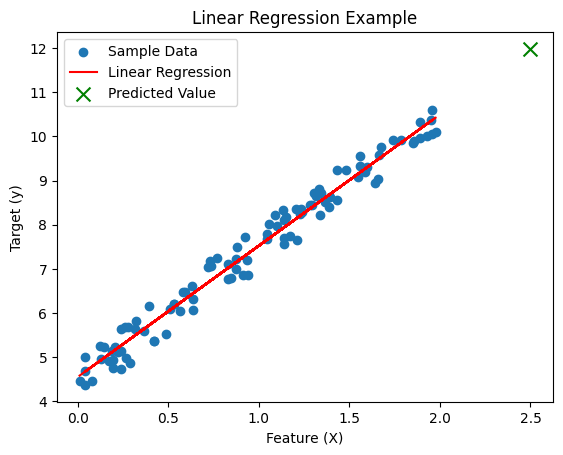

In [ ]:
 # LINEAR REGRESSION

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some sample data for demonstration
# In practice, you would replace this with your own dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the trained model
X_new = np.array([[2.5]])  # Example input for prediction
y_pred = model.predict(X_new)

# Display the model parameters
print(f"Intercept (theta_0): {model.intercept_}")
print(f"Coefficient (theta_1): {model.coef_}")

# Plot the data and regression line
plt.scatter(X, y, label='Sample Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label='Predicted Value')
plt.legend()
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Example")
plt.show()


Ex-9Desition Tree

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


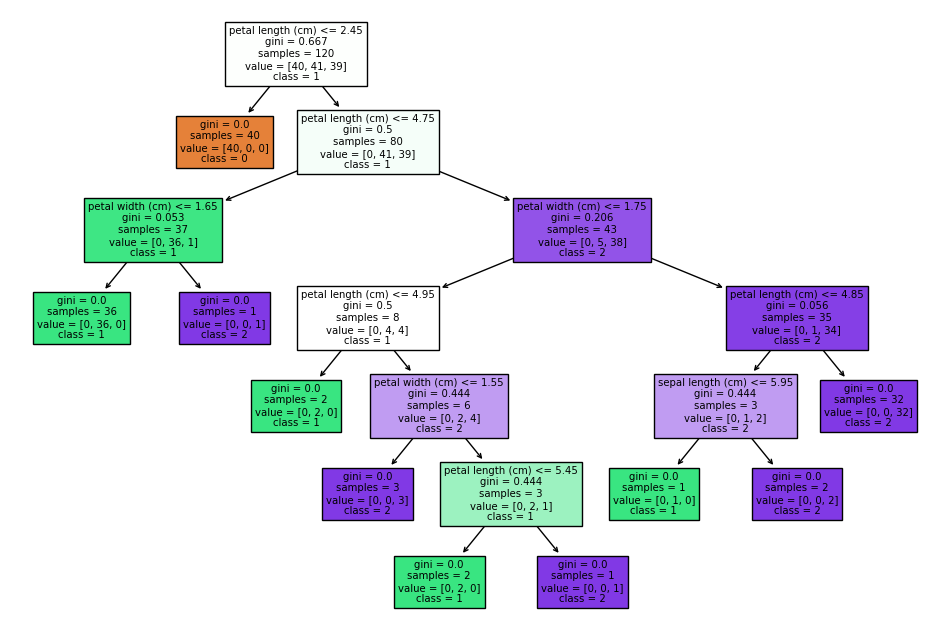

In [ ]:
#DECISION TREE

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{confusion}")

# Visualize the decision tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=[str(c) for c in clf.classes_])
plt.show()


Ex-10-Support Vector Machine

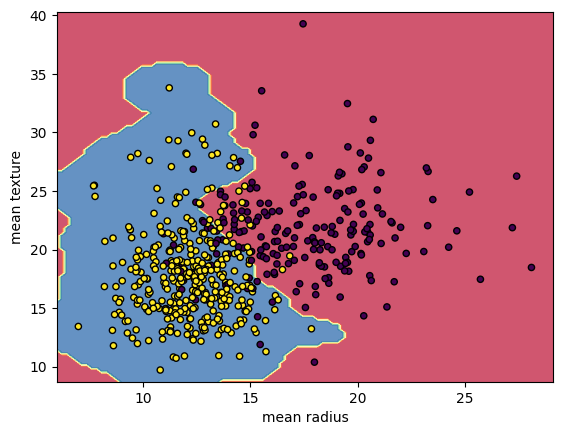

In [ ]:
# support vector machine
# Load the important packages

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()